In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.DataFrame({
    'duration': [3.600, 1.800, 2.283, 3.333, 2.883, 4.533, 1.950, 1.833, 4.700, 3.600, 1.600, 4.350, 3.917, 4.200, 1.750,1.800,
          4.700, 2.167, 4.800, 1.750],
    'wait': [79, 54, 62, 74, 55, 85, 51, 54, 88, 85, 52, 85, 84, 78, 62, 51, 83, 52, 84, 47]
})

In [3]:
df

,duration,wait
0,3.600,79
1,1.800,54
2,2.283,62
3,3.333,74
4,2.883,55
5,4.533,85
6,1.950,51
7,1.833,54
8,4.700,88
9,3.600,85


In [4]:
# Number of clusters = 3
K = 3

In [5]:
minDuration = df['duration'].min()
maxDuration = df['duration'].max()

minWait = df['wait'].min()
maxWait = df['wait'].max()

dur_bar = (maxDuration - minDuration) / (K+1)
wait_bar = (maxWait - minWait) / (K+1)

print(dur_bar,"\n",wait_bar)

0.7999999999999999 
 10.25


In [6]:
print(minDuration,"\n",maxDuration,"\n",minWait,"\n",maxWait)

1.6 
 4.8 
 47 
 88


In [7]:
'''centroids = []
for i in range(K):
    centr_dur = minDuration + (i+1)*dur_bar
    centr_wait = minWait + (i+1)*wait_bar
    centroids.append([centr_dur,centr_wait])
    
centroids'''

[[2.4, 57.25], [3.2, 67.5], [4.0, 77.75]]

In [8]:
centroids = [[1.97287,52.0],[4.173,82.5],[2.0165,62.0]]

In [9]:
iterations = 100

def centroidCluster():
    cluster1duration = df[df['clusters']==1]['duration'].mean()
    cluster2duration = df[df['clusters']==2]['duration'].mean()
    cluster3duration = df[df['clusters']==3]['duration'].mean()
    cluster1wait = df[df['clusters']==1]['wait'].mean()
    cluster2wait = df[df['clusters']==2]['wait'].mean()
    cluster3wait = df[df['clusters']==3]['wait'].mean()
    
    centroids[0][0] = cluster1duration
    centroids[0][1] = cluster1wait
    centroids[1][0] = cluster2duration
    centroids[1][1] = cluster2wait
    centroids[2][0] = cluster3duration
    centroids[2][1] = cluster3wait

    #print(centroids)

In [10]:
centroids


[[1.97287, 52.0], [4.173, 82.5], [2.0165, 62.0]]

In [21]:
def clusterAssign(X):
    minDist = float("inf")
    #cluster = 1
    for i in range(3):
        dist = 0
        for j in range(2):
            dist += (X[j] - centroids[i][j]) ** 2
        print("distance from cluster",i+1,":",dist ** (0.5))
        if dist < minDist:
            minDist = dist
            cluster = (i+1)
    
    print("Resultant cluster:",cluster)
    return cluster

In [22]:
clusters = []
for index, rows in df.iterrows():
    
    # Create list for the current row 
    entry =[rows.duration, rows.wait] 
    print(entry)
    clusters.append(clusterAssign(entry))
    
df['clusters'] = clusters

df

[3.6, 79.0]
distance from cluster 1 : 27.04898400616232
distance from cluster 2 : 3.546642481277187
distance from cluster 3 : 17.073589905172255
Resultant cluster: 2
[1.8, 54.0]
distance from cluster 1 : 2.0074575376891537
distance from cluster 2 : 28.59864599749436
distance from cluster 3 : 8.002928979442464
Resultant cluster: 1
[2.283, 62.0]
distance from cluster 1 : 10.004807720072636
distance from cluster 2 : 20.586967578786343
distance from cluster 3 : 0.2665000000000002
Resultant cluster: 3
[3.333, 74.0]
distance from cluster 1 : 22.042003992732262
distance from cluster 2 : 8.54143454520375
distance from cluster 3 : 12.071999513336637
Resultant cluster: 2
[2.883, 55.0]
distance from cluster 1 : 3.13501635013679
distance from cluster 2 : 27.53025379632378
distance from cluster 3 : 7.053426277349186
Resultant cluster: 1
[4.533, 85.0]
distance from cluster 1 : 33.099157693446294
distance from cluster 2 : 2.5257442645683668
distance from cluster 3 : 23.137259393670632
Resultant clust

,duration,wait,clusters
0,3.600,79,2
1,1.800,54,1
2,2.283,62,3
3,3.333,74,2
4,2.883,55,1
5,4.533,85,2
6,1.950,51,1
7,1.833,54,1
8,4.700,88,2
9,3.600,85,2


In [23]:
centroids

[[1.972875, 52.0], [4.1733, 82.5], [2.0164999999999997, 62.0]]

In [24]:
centroidCluster()

In [25]:
centroids

[[1.972875, 52.0], [4.1733, 82.5], [2.0164999999999997, 62.0]]

In [26]:
clusters

[2, 1, 3, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 3, 1, 2, 1, 2, 1]

In [28]:
for iter in range(iterations+200):
    centroidCluster()
    #print(centroids)
    clusters.clear()
    
    for index, rows in df.iterrows():
        # Create list for the current row 
        entry =[rows.duration, rows.wait]
        print("Row no",index+1,":",entry)
        clusters.append(clusterAssign(entry))
    df['clusters'] = clusters
    
df

Row no 1 : [3.6, 79.0]
distance from cluster 1 : 27.04898400616232
distance from cluster 2 : 3.546642481277187
distance from cluster 3 : 17.073589905172255
Resultant cluster: 2
Row no 2 : [1.8, 54.0]
distance from cluster 1 : 2.0074575376891537
distance from cluster 2 : 28.59864599749436
distance from cluster 3 : 8.002928979442464
Resultant cluster: 1
Row no 3 : [2.283, 62.0]
distance from cluster 1 : 10.004807720072636
distance from cluster 2 : 20.586967578786343
distance from cluster 3 : 0.2665000000000002
Resultant cluster: 3
Row no 4 : [3.333, 74.0]
distance from cluster 1 : 22.042003992732262
distance from cluster 2 : 8.54143454520375
distance from cluster 3 : 12.071999513336637
Resultant cluster: 2
Row no 5 : [2.883, 55.0]
distance from cluster 1 : 3.13501635013679
distance from cluster 2 : 27.53025379632378
distance from cluster 3 : 7.053426277349186
Resultant cluster: 1
Row no 6 : [4.533, 85.0]
distance from cluster 1 : 33.099157693446294
distance from cluster 2 : 2.52574426456

Resultant cluster: 2
Row no 2 : [1.8, 54.0]
distance from cluster 1 : 2.0074575376891537
distance from cluster 2 : 28.59864599749436
distance from cluster 3 : 8.002928979442464
Resultant cluster: 1
Row no 3 : [2.283, 62.0]
distance from cluster 1 : 10.004807720072636
distance from cluster 2 : 20.586967578786343
distance from cluster 3 : 0.2665000000000002
Resultant cluster: 3
Row no 4 : [3.333, 74.0]
distance from cluster 1 : 22.042003992732262
distance from cluster 2 : 8.54143454520375
distance from cluster 3 : 12.071999513336637
Resultant cluster: 2
Row no 5 : [2.883, 55.0]
distance from cluster 1 : 3.13501635013679
distance from cluster 2 : 27.53025379632378
distance from cluster 3 : 7.053426277349186
Resultant cluster: 1
Row no 6 : [4.533, 85.0]
distance from cluster 1 : 33.099157693446294
distance from cluster 2 : 2.5257442645683668
distance from cluster 3 : 23.137259393670632
Resultant cluster: 2
Row no 7 : [1.95, 51.0]
distance from cluster 1 : 1.0002615985955874
distance from c

Row no 1 : [3.6, 79.0]
distance from cluster 1 : 27.04898400616232
distance from cluster 2 : 3.546642481277187
distance from cluster 3 : 17.073589905172255
Resultant cluster: 2
Row no 2 : [1.8, 54.0]
distance from cluster 1 : 2.0074575376891537
distance from cluster 2 : 28.59864599749436
distance from cluster 3 : 8.002928979442464
Resultant cluster: 1
Row no 3 : [2.283, 62.0]
distance from cluster 1 : 10.004807720072636
distance from cluster 2 : 20.586967578786343
distance from cluster 3 : 0.2665000000000002
Resultant cluster: 3
Row no 4 : [3.333, 74.0]
distance from cluster 1 : 22.042003992732262
distance from cluster 2 : 8.54143454520375
distance from cluster 3 : 12.071999513336637
Resultant cluster: 2
Row no 5 : [2.883, 55.0]
distance from cluster 1 : 3.13501635013679
distance from cluster 2 : 27.53025379632378
distance from cluster 3 : 7.053426277349186
Resultant cluster: 1
Row no 6 : [4.533, 85.0]
distance from cluster 1 : 33.099157693446294
distance from cluster 2 : 2.52574426456

distance from cluster 1 : 1.0002615985955874
distance from cluster 2 : 31.57836384124421
distance from cluster 3 : 11.000201009527053
Resultant cluster: 1
Row no 8 : [1.833, 54.0]
distance from cluster 1 : 2.0048852873980096
distance from cluster 2 : 28.595926354814946
distance from cluster 3 : 8.002104238886169
Resultant cluster: 1
Row no 9 : [4.7, 88.0]
distance from cluster 1 : 36.103146826358845
distance from cluster 2 : 5.525161797630908
distance from cluster 3 : 26.138117228484536
Resultant cluster: 2
Row no 10 : [3.6, 85.0]
distance from cluster 1 : 33.04008982683953
distance from cluster 2 : 2.5648923739603577
distance from cluster 3 : 23.054445823962023
Resultant cluster: 2
Row no 11 : [1.6, 52.0]
distance from cluster 1 : 0.37287499999999985
distance from cluster 2 : 30.6083627933609
distance from cluster 3 : 10.008669854181424
Resultant cluster: 1
Row no 12 : [4.35, 85.0]
distance from cluster 1 : 33.08550624164039
distance from cluster 2 : 2.5062367984689713
distance from c

Resultant cluster: 2
Row no 18 : [2.167, 52.0]
distance from cluster 1 : 0.19412499999999988
distance from cluster 2 : 30.56591630705679
distance from cluster 3 : 10.001132448378034
Resultant cluster: 1
Row no 19 : [4.8, 84.0]
distance from cluster 1 : 32.124642188912006
distance from cluster 2 : 1.62565460353668
distance from cluster 3 : 22.175388886105246
Resultant cluster: 2
Row no 20 : [1.75, 47.0]
distance from cluster 1 : 5.004964861577451
distance from cluster 2 : 35.58261349156354
distance from cluster 3 : 15.002367221542073
Resultant cluster: 1
Row no 1 : [3.6, 79.0]
distance from cluster 1 : 27.04898400616232
distance from cluster 2 : 3.546642481277187
distance from cluster 3 : 17.073589905172255
Resultant cluster: 2
Row no 2 : [1.8, 54.0]
distance from cluster 1 : 2.0074575376891537
distance from cluster 2 : 28.59864599749436
distance from cluster 3 : 8.002928979442464
Resultant cluster: 1
Row no 3 : [2.283, 62.0]
distance from cluster 1 : 10.004807720072636
distance from cl

distance from cluster 3 : 8.002104238886169
Resultant cluster: 1
Row no 9 : [4.7, 88.0]
distance from cluster 1 : 36.103146826358845
distance from cluster 2 : 5.525161797630908
distance from cluster 3 : 26.138117228484536
Resultant cluster: 2
Row no 10 : [3.6, 85.0]
distance from cluster 1 : 33.04008982683953
distance from cluster 2 : 2.5648923739603577
distance from cluster 3 : 23.054445823962023
Resultant cluster: 2
Row no 11 : [1.6, 52.0]
distance from cluster 1 : 0.37287499999999985
distance from cluster 2 : 30.6083627933609
distance from cluster 3 : 10.008669854181424
Resultant cluster: 1
Row no 12 : [4.35, 85.0]
distance from cluster 1 : 33.08550624164039
distance from cluster 2 : 2.5062367984689713
distance from cluster 3 : 23.118071334996785
Resultant cluster: 2
Row no 13 : [3.917, 84.0]
distance from cluster 1 : 32.05900219931408
distance from cluster 2 : 1.521739034788817
distance from cluster 3 : 22.081936062084775
Resultant cluster: 2
Row no 14 : [4.2, 78.0]
distance from c

Row no 12 : [4.35, 85.0]
distance from cluster 1 : 33.08550624164039
distance from cluster 2 : 2.5062367984689713
distance from cluster 3 : 23.118071334996785
Resultant cluster: 2
Row no 13 : [3.917, 84.0]
distance from cluster 1 : 32.05900219931408
distance from cluster 2 : 1.521739034788817
distance from cluster 3 : 22.081936062084775
Resultant cluster: 2
Row no 14 : [4.2, 78.0]
distance from cluster 1 : 26.095211931801302
distance from cluster 2 : 4.500079209302876
distance from cluster 3 : 16.14830245722441
Resultant cluster: 2
Row no 15 : [1.75, 62.0]
distance from cluster 1 : 10.002483354928666
distance from cluster 2 : 20.642731962848327
distance from cluster 3 : 0.26649999999999974
Resultant cluster: 3
Row no 16 : [1.8, 51.0]
distance from cluster 1 : 1.0148328757115628
distance from cluster 2 : 31.589279081517514
distance from cluster 3 : 11.002130350527574
Resultant cluster: 1
Row no 17 : [4.7, 83.0]
distance from cluster 1 : 31.11972382212967
distance from cluster 2 : 0.7262

distance from cluster 3 : 7.053426277349186
Resultant cluster: 1
Row no 6 : [4.533, 85.0]
distance from cluster 1 : 33.099157693446294
distance from cluster 2 : 2.5257442645683668
distance from cluster 3 : 23.137259393670632
Resultant cluster: 2
Row no 7 : [1.95, 51.0]
distance from cluster 1 : 1.0002615985955874
distance from cluster 2 : 31.57836384124421
distance from cluster 3 : 11.000201009527053
Resultant cluster: 1
Row no 8 : [1.833, 54.0]
distance from cluster 1 : 2.0048852873980096
distance from cluster 2 : 28.595926354814946
distance from cluster 3 : 8.002104238886169
Resultant cluster: 1
Row no 9 : [4.7, 88.0]
distance from cluster 1 : 36.103146826358845
distance from cluster 2 : 5.525161797630908
distance from cluster 3 : 26.138117228484536
Resultant cluster: 2
Row no 10 : [3.6, 85.0]
distance from cluster 1 : 33.04008982683953
distance from cluster 2 : 2.5648923739603577
distance from cluster 3 : 23.054445823962023
Resultant cluster: 2
Row no 11 : [1.6, 52.0]
distance from 

distance from cluster 3 : 8.002928979442464
Resultant cluster: 1
Row no 3 : [2.283, 62.0]
distance from cluster 1 : 10.004807720072636
distance from cluster 2 : 20.586967578786343
distance from cluster 3 : 0.2665000000000002
Resultant cluster: 3
Row no 4 : [3.333, 74.0]
distance from cluster 1 : 22.042003992732262
distance from cluster 2 : 8.54143454520375
distance from cluster 3 : 12.071999513336637
Resultant cluster: 2
Row no 5 : [2.883, 55.0]
distance from cluster 1 : 3.13501635013679
distance from cluster 2 : 27.53025379632378
distance from cluster 3 : 7.053426277349186
Resultant cluster: 1
Row no 6 : [4.533, 85.0]
distance from cluster 1 : 33.099157693446294
distance from cluster 2 : 2.5257442645683668
distance from cluster 3 : 23.137259393670632
Resultant cluster: 2
Row no 7 : [1.95, 51.0]
distance from cluster 1 : 1.0002615985955874
distance from cluster 2 : 31.57836384124421
distance from cluster 3 : 11.000201009527053
Resultant cluster: 1
Row no 8 : [1.833, 54.0]
distance from

distance from cluster 1 : 33.099157693446294
distance from cluster 2 : 2.5257442645683668
distance from cluster 3 : 23.137259393670632
Resultant cluster: 2
Row no 7 : [1.95, 51.0]
distance from cluster 1 : 1.0002615985955874
distance from cluster 2 : 31.57836384124421
distance from cluster 3 : 11.000201009527053
Resultant cluster: 1
Row no 8 : [1.833, 54.0]
distance from cluster 1 : 2.0048852873980096
distance from cluster 2 : 28.595926354814946
distance from cluster 3 : 8.002104238886169
Resultant cluster: 1
Row no 9 : [4.7, 88.0]
distance from cluster 1 : 36.103146826358845
distance from cluster 2 : 5.525161797630908
distance from cluster 3 : 26.138117228484536
Resultant cluster: 2
Row no 10 : [3.6, 85.0]
distance from cluster 1 : 33.04008982683953
distance from cluster 2 : 2.5648923739603577
distance from cluster 3 : 23.054445823962023
Resultant cluster: 2
Row no 11 : [1.6, 52.0]
distance from cluster 1 : 0.37287499999999985
distance from cluster 2 : 30.6083627933609
distance from c

distance from cluster 3 : 17.073589905172255
Resultant cluster: 2
Row no 2 : [1.8, 54.0]
distance from cluster 1 : 2.0074575376891537
distance from cluster 2 : 28.59864599749436
distance from cluster 3 : 8.002928979442464
Resultant cluster: 1
Row no 3 : [2.283, 62.0]
distance from cluster 1 : 10.004807720072636
distance from cluster 2 : 20.586967578786343
distance from cluster 3 : 0.2665000000000002
Resultant cluster: 3
Row no 4 : [3.333, 74.0]
distance from cluster 1 : 22.042003992732262
distance from cluster 2 : 8.54143454520375
distance from cluster 3 : 12.071999513336637
Resultant cluster: 2
Row no 5 : [2.883, 55.0]
distance from cluster 1 : 3.13501635013679
distance from cluster 2 : 27.53025379632378
distance from cluster 3 : 7.053426277349186
Resultant cluster: 1
Row no 6 : [4.533, 85.0]
distance from cluster 1 : 33.099157693446294
distance from cluster 2 : 2.5257442645683668
distance from cluster 3 : 23.137259393670632
Resultant cluster: 2
Row no 7 : [1.95, 51.0]
distance from c

Row no 5 : [2.883, 55.0]
distance from cluster 1 : 3.13501635013679
distance from cluster 2 : 27.53025379632378
distance from cluster 3 : 7.053426277349186
Resultant cluster: 1
Row no 6 : [4.533, 85.0]
distance from cluster 1 : 33.099157693446294
distance from cluster 2 : 2.5257442645683668
distance from cluster 3 : 23.137259393670632
Resultant cluster: 2
Row no 7 : [1.95, 51.0]
distance from cluster 1 : 1.0002615985955874
distance from cluster 2 : 31.57836384124421
distance from cluster 3 : 11.000201009527053
Resultant cluster: 1
Row no 8 : [1.833, 54.0]
distance from cluster 1 : 2.0048852873980096
distance from cluster 2 : 28.595926354814946
distance from cluster 3 : 8.002104238886169
Resultant cluster: 1
Row no 9 : [4.7, 88.0]
distance from cluster 1 : 36.103146826358845
distance from cluster 2 : 5.525161797630908
distance from cluster 3 : 26.138117228484536
Resultant cluster: 2
Row no 10 : [3.6, 85.0]
distance from cluster 1 : 33.04008982683953
distance from cluster 2 : 2.564892373

distance from cluster 2 : 0.7262319808435869
distance from cluster 3 : 21.170762202858924
Resultant cluster: 2
Row no 18 : [2.167, 52.0]
distance from cluster 1 : 0.19412499999999988
distance from cluster 2 : 30.56591630705679
distance from cluster 3 : 10.001132448378034
Resultant cluster: 1
Row no 19 : [4.8, 84.0]
distance from cluster 1 : 32.124642188912006
distance from cluster 2 : 1.62565460353668
distance from cluster 3 : 22.175388886105246
Resultant cluster: 2
Row no 20 : [1.75, 47.0]
distance from cluster 1 : 5.004964861577451
distance from cluster 2 : 35.58261349156354
distance from cluster 3 : 15.002367221542073
Resultant cluster: 1
Row no 1 : [3.6, 79.0]
distance from cluster 1 : 27.04898400616232
distance from cluster 2 : 3.546642481277187
distance from cluster 3 : 17.073589905172255
Resultant cluster: 2
Row no 2 : [1.8, 54.0]
distance from cluster 1 : 2.0074575376891537
distance from cluster 2 : 28.59864599749436
distance from cluster 3 : 8.002928979442464
Resultant cluster

Resultant cluster: 2
Row no 7 : [1.95, 51.0]
distance from cluster 1 : 1.0002615985955874
distance from cluster 2 : 31.57836384124421
distance from cluster 3 : 11.000201009527053
Resultant cluster: 1
Row no 8 : [1.833, 54.0]
distance from cluster 1 : 2.0048852873980096
distance from cluster 2 : 28.595926354814946
distance from cluster 3 : 8.002104238886169
Resultant cluster: 1
Row no 9 : [4.7, 88.0]
distance from cluster 1 : 36.103146826358845
distance from cluster 2 : 5.525161797630908
distance from cluster 3 : 26.138117228484536
Resultant cluster: 2
Row no 10 : [3.6, 85.0]
distance from cluster 1 : 33.04008982683953
distance from cluster 2 : 2.5648923739603577
distance from cluster 3 : 23.054445823962023
Resultant cluster: 2
Row no 11 : [1.6, 52.0]
distance from cluster 1 : 0.37287499999999985
distance from cluster 2 : 30.6083627933609
distance from cluster 3 : 10.008669854181424
Resultant cluster: 1
Row no 12 : [4.35, 85.0]
distance from cluster 1 : 33.08550624164039
distance from c

distance from cluster 3 : 22.175388886105246
Resultant cluster: 2
Row no 20 : [1.75, 47.0]
distance from cluster 1 : 5.004964861577451
distance from cluster 2 : 35.58261349156354
distance from cluster 3 : 15.002367221542073
Resultant cluster: 1
Row no 1 : [3.6, 79.0]
distance from cluster 1 : 27.04898400616232
distance from cluster 2 : 3.546642481277187
distance from cluster 3 : 17.073589905172255
Resultant cluster: 2
Row no 2 : [1.8, 54.0]
distance from cluster 1 : 2.0074575376891537
distance from cluster 2 : 28.59864599749436
distance from cluster 3 : 8.002928979442464
Resultant cluster: 1
Row no 3 : [2.283, 62.0]
distance from cluster 1 : 10.004807720072636
distance from cluster 2 : 20.586967578786343
distance from cluster 3 : 0.2665000000000002
Resultant cluster: 3
Row no 4 : [3.333, 74.0]
distance from cluster 1 : 22.042003992732262
distance from cluster 2 : 8.54143454520375
distance from cluster 3 : 12.071999513336637
Resultant cluster: 2
Row no 5 : [2.883, 55.0]
distance from cl

Resultant cluster: 2
Row no 15 : [1.75, 62.0]
distance from cluster 1 : 10.002483354928666
distance from cluster 2 : 20.642731962848327
distance from cluster 3 : 0.26649999999999974
Resultant cluster: 3
Row no 16 : [1.8, 51.0]
distance from cluster 1 : 1.0148328757115628
distance from cluster 2 : 31.589279081517514
distance from cluster 3 : 11.002130350527574
Resultant cluster: 1
Row no 17 : [4.7, 83.0]
distance from cluster 1 : 31.11972382212967
distance from cluster 2 : 0.7262319808435869
distance from cluster 3 : 21.170762202858924
Resultant cluster: 2
Row no 18 : [2.167, 52.0]
distance from cluster 1 : 0.19412499999999988
distance from cluster 2 : 30.56591630705679
distance from cluster 3 : 10.001132448378034
Resultant cluster: 1
Row no 19 : [4.8, 84.0]
distance from cluster 1 : 32.124642188912006
distance from cluster 2 : 1.62565460353668
distance from cluster 3 : 22.175388886105246
Resultant cluster: 2
Row no 20 : [1.75, 47.0]
distance from cluster 1 : 5.004964861577451
distance 

distance from cluster 3 : 23.137259393670632
Resultant cluster: 2
Row no 7 : [1.95, 51.0]
distance from cluster 1 : 1.0002615985955874
distance from cluster 2 : 31.57836384124421
distance from cluster 3 : 11.000201009527053
Resultant cluster: 1
Row no 8 : [1.833, 54.0]
distance from cluster 1 : 2.0048852873980096
distance from cluster 2 : 28.595926354814946
distance from cluster 3 : 8.002104238886169
Resultant cluster: 1
Row no 9 : [4.7, 88.0]
distance from cluster 1 : 36.103146826358845
distance from cluster 2 : 5.525161797630908
distance from cluster 3 : 26.138117228484536
Resultant cluster: 2
Row no 10 : [3.6, 85.0]
distance from cluster 1 : 33.04008982683953
distance from cluster 2 : 2.5648923739603577
distance from cluster 3 : 23.054445823962023
Resultant cluster: 2
Row no 11 : [1.6, 52.0]
distance from cluster 1 : 0.37287499999999985
distance from cluster 2 : 30.6083627933609
distance from cluster 3 : 10.008669854181424
Resultant cluster: 1
Row no 12 : [4.35, 85.0]
distance from 

distance from cluster 1 : 0.19412499999999988
distance from cluster 2 : 30.56591630705679
distance from cluster 3 : 10.001132448378034
Resultant cluster: 1
Row no 19 : [4.8, 84.0]
distance from cluster 1 : 32.124642188912006
distance from cluster 2 : 1.62565460353668
distance from cluster 3 : 22.175388886105246
Resultant cluster: 2
Row no 20 : [1.75, 47.0]
distance from cluster 1 : 5.004964861577451
distance from cluster 2 : 35.58261349156354
distance from cluster 3 : 15.002367221542073
Resultant cluster: 1
Row no 1 : [3.6, 79.0]
distance from cluster 1 : 27.04898400616232
distance from cluster 2 : 3.546642481277187
distance from cluster 3 : 17.073589905172255
Resultant cluster: 2
Row no 2 : [1.8, 54.0]
distance from cluster 1 : 2.0074575376891537
distance from cluster 2 : 28.59864599749436
distance from cluster 3 : 8.002928979442464
Resultant cluster: 1
Row no 3 : [2.283, 62.0]
distance from cluster 1 : 10.004807720072636
distance from cluster 2 : 20.586967578786343
distance from clus

Resultant cluster: 1
Row no 17 : [4.7, 83.0]
distance from cluster 1 : 31.11972382212967
distance from cluster 2 : 0.7262319808435869
distance from cluster 3 : 21.170762202858924
Resultant cluster: 2
Row no 18 : [2.167, 52.0]
distance from cluster 1 : 0.19412499999999988
distance from cluster 2 : 30.56591630705679
distance from cluster 3 : 10.001132448378034
Resultant cluster: 1
Row no 19 : [4.8, 84.0]
distance from cluster 1 : 32.124642188912006
distance from cluster 2 : 1.62565460353668
distance from cluster 3 : 22.175388886105246
Resultant cluster: 2
Row no 20 : [1.75, 47.0]
distance from cluster 1 : 5.004964861577451
distance from cluster 2 : 35.58261349156354
distance from cluster 3 : 15.002367221542073
Resultant cluster: 1
Row no 1 : [3.6, 79.0]
distance from cluster 1 : 27.04898400616232
distance from cluster 2 : 3.546642481277187
distance from cluster 3 : 17.073589905172255
Resultant cluster: 2
Row no 2 : [1.8, 54.0]
distance from cluster 1 : 2.0074575376891537
distance from cl

distance from cluster 1 : 32.124642188912006
distance from cluster 2 : 1.62565460353668
distance from cluster 3 : 22.175388886105246
Resultant cluster: 2
Row no 20 : [1.75, 47.0]
distance from cluster 1 : 5.004964861577451
distance from cluster 2 : 35.58261349156354
distance from cluster 3 : 15.002367221542073
Resultant cluster: 1
Row no 1 : [3.6, 79.0]
distance from cluster 1 : 27.04898400616232
distance from cluster 2 : 3.546642481277187
distance from cluster 3 : 17.073589905172255
Resultant cluster: 2
Row no 2 : [1.8, 54.0]
distance from cluster 1 : 2.0074575376891537
distance from cluster 2 : 28.59864599749436
distance from cluster 3 : 8.002928979442464
Resultant cluster: 1
Row no 3 : [2.283, 62.0]
distance from cluster 1 : 10.004807720072636
distance from cluster 2 : 20.586967578786343
distance from cluster 3 : 0.2665000000000002
Resultant cluster: 3
Row no 4 : [3.333, 74.0]
distance from cluster 1 : 22.042003992732262
distance from cluster 2 : 8.54143454520375
distance from clust

distance from cluster 2 : 5.525161797630908
distance from cluster 3 : 26.138117228484536
Resultant cluster: 2
Row no 10 : [3.6, 85.0]
distance from cluster 1 : 33.04008982683953
distance from cluster 2 : 2.5648923739603577
distance from cluster 3 : 23.054445823962023
Resultant cluster: 2
Row no 11 : [1.6, 52.0]
distance from cluster 1 : 0.37287499999999985
distance from cluster 2 : 30.6083627933609
distance from cluster 3 : 10.008669854181424
Resultant cluster: 1
Row no 12 : [4.35, 85.0]
distance from cluster 1 : 33.08550624164039
distance from cluster 2 : 2.5062367984689713
distance from cluster 3 : 23.118071334996785
Resultant cluster: 2
Row no 13 : [3.917, 84.0]
distance from cluster 1 : 32.05900219931408
distance from cluster 2 : 1.521739034788817
distance from cluster 3 : 22.081936062084775
Resultant cluster: 2
Row no 14 : [4.2, 78.0]
distance from cluster 1 : 26.095211931801302
distance from cluster 2 : 4.500079209302876
distance from cluster 3 : 16.14830245722441
Resultant clust

distance from cluster 1 : 0.37287499999999985
distance from cluster 2 : 30.6083627933609
distance from cluster 3 : 10.008669854181424
Resultant cluster: 1
Row no 12 : [4.35, 85.0]
distance from cluster 1 : 33.08550624164039
distance from cluster 2 : 2.5062367984689713
distance from cluster 3 : 23.118071334996785
Resultant cluster: 2
Row no 13 : [3.917, 84.0]
distance from cluster 1 : 32.05900219931408
distance from cluster 2 : 1.521739034788817
distance from cluster 3 : 22.081936062084775
Resultant cluster: 2
Row no 14 : [4.2, 78.0]
distance from cluster 1 : 26.095211931801302
distance from cluster 2 : 4.500079209302876
distance from cluster 3 : 16.14830245722441
Resultant cluster: 2
Row no 15 : [1.75, 62.0]
distance from cluster 1 : 10.002483354928666
distance from cluster 2 : 20.642731962848327
distance from cluster 3 : 0.26649999999999974
Resultant cluster: 3
Row no 16 : [1.8, 51.0]
distance from cluster 1 : 1.0148328757115628
distance from cluster 2 : 31.589279081517514
distance fr

distance from cluster 1 : 31.11972382212967
distance from cluster 2 : 0.7262319808435869
distance from cluster 3 : 21.170762202858924
Resultant cluster: 2
Row no 18 : [2.167, 52.0]
distance from cluster 1 : 0.19412499999999988
distance from cluster 2 : 30.56591630705679
distance from cluster 3 : 10.001132448378034
Resultant cluster: 1
Row no 19 : [4.8, 84.0]
distance from cluster 1 : 32.124642188912006
distance from cluster 2 : 1.62565460353668
distance from cluster 3 : 22.175388886105246
Resultant cluster: 2
Row no 20 : [1.75, 47.0]
distance from cluster 1 : 5.004964861577451
distance from cluster 2 : 35.58261349156354
distance from cluster 3 : 15.002367221542073
Resultant cluster: 1
Row no 1 : [3.6, 79.0]
distance from cluster 1 : 27.04898400616232
distance from cluster 2 : 3.546642481277187
distance from cluster 3 : 17.073589905172255
Resultant cluster: 2
Row no 2 : [1.8, 54.0]
distance from cluster 1 : 2.0074575376891537
distance from cluster 2 : 28.59864599749436
distance from clu

distance from cluster 1 : 2.0074575376891537
distance from cluster 2 : 28.59864599749436
distance from cluster 3 : 8.002928979442464
Resultant cluster: 1
Row no 3 : [2.283, 62.0]
distance from cluster 1 : 10.004807720072636
distance from cluster 2 : 20.586967578786343
distance from cluster 3 : 0.2665000000000002
Resultant cluster: 3
Row no 4 : [3.333, 74.0]
distance from cluster 1 : 22.042003992732262
distance from cluster 2 : 8.54143454520375
distance from cluster 3 : 12.071999513336637
Resultant cluster: 2
Row no 5 : [2.883, 55.0]
distance from cluster 1 : 3.13501635013679
distance from cluster 2 : 27.53025379632378
distance from cluster 3 : 7.053426277349186
Resultant cluster: 1
Row no 6 : [4.533, 85.0]
distance from cluster 1 : 33.099157693446294
distance from cluster 2 : 2.5257442645683668
distance from cluster 3 : 23.137259393670632
Resultant cluster: 2
Row no 7 : [1.95, 51.0]
distance from cluster 1 : 1.0002615985955874
distance from cluster 2 : 31.57836384124421
distance from c

distance from cluster 2 : 1.521739034788817
distance from cluster 3 : 22.081936062084775
Resultant cluster: 2
Row no 14 : [4.2, 78.0]
distance from cluster 1 : 26.095211931801302
distance from cluster 2 : 4.500079209302876
distance from cluster 3 : 16.14830245722441
Resultant cluster: 2
Row no 15 : [1.75, 62.0]
distance from cluster 1 : 10.002483354928666
distance from cluster 2 : 20.642731962848327
distance from cluster 3 : 0.26649999999999974
Resultant cluster: 3
Row no 16 : [1.8, 51.0]
distance from cluster 1 : 1.0148328757115628
distance from cluster 2 : 31.589279081517514
distance from cluster 3 : 11.002130350527574
Resultant cluster: 1
Row no 17 : [4.7, 83.0]
distance from cluster 1 : 31.11972382212967
distance from cluster 2 : 0.7262319808435869
distance from cluster 3 : 21.170762202858924
Resultant cluster: 2
Row no 18 : [2.167, 52.0]
distance from cluster 1 : 0.19412499999999988
distance from cluster 2 : 30.56591630705679
distance from cluster 3 : 10.001132448378034
Resultant 

distance from cluster 3 : 10.008669854181424
Resultant cluster: 1
Row no 12 : [4.35, 85.0]
distance from cluster 1 : 33.08550624164039
distance from cluster 2 : 2.5062367984689713
distance from cluster 3 : 23.118071334996785
Resultant cluster: 2
Row no 13 : [3.917, 84.0]
distance from cluster 1 : 32.05900219931408
distance from cluster 2 : 1.521739034788817
distance from cluster 3 : 22.081936062084775
Resultant cluster: 2
Row no 14 : [4.2, 78.0]
distance from cluster 1 : 26.095211931801302
distance from cluster 2 : 4.500079209302876
distance from cluster 3 : 16.14830245722441
Resultant cluster: 2
Row no 15 : [1.75, 62.0]
distance from cluster 1 : 10.002483354928666
distance from cluster 2 : 20.642731962848327
distance from cluster 3 : 0.26649999999999974
Resultant cluster: 3
Row no 16 : [1.8, 51.0]
distance from cluster 1 : 1.0148328757115628
distance from cluster 2 : 31.589279081517514
distance from cluster 3 : 11.002130350527574
Resultant cluster: 1
Row no 17 : [4.7, 83.0]
distance f

Resultant cluster: 1
Row no 6 : [4.533, 85.0]
distance from cluster 1 : 33.099157693446294
distance from cluster 2 : 2.5257442645683668
distance from cluster 3 : 23.137259393670632
Resultant cluster: 2
Row no 7 : [1.95, 51.0]
distance from cluster 1 : 1.0002615985955874
distance from cluster 2 : 31.57836384124421
distance from cluster 3 : 11.000201009527053
Resultant cluster: 1
Row no 8 : [1.833, 54.0]
distance from cluster 1 : 2.0048852873980096
distance from cluster 2 : 28.595926354814946
distance from cluster 3 : 8.002104238886169
Resultant cluster: 1
Row no 9 : [4.7, 88.0]
distance from cluster 1 : 36.103146826358845
distance from cluster 2 : 5.525161797630908
distance from cluster 3 : 26.138117228484536
Resultant cluster: 2
Row no 10 : [3.6, 85.0]
distance from cluster 1 : 33.04008982683953
distance from cluster 2 : 2.5648923739603577
distance from cluster 3 : 23.054445823962023
Resultant cluster: 2
Row no 11 : [1.6, 52.0]
distance from cluster 1 : 0.37287499999999985
distance fro

distance from cluster 2 : 2.5257442645683668
distance from cluster 3 : 23.137259393670632
Resultant cluster: 2
Row no 7 : [1.95, 51.0]
distance from cluster 1 : 1.0002615985955874
distance from cluster 2 : 31.57836384124421
distance from cluster 3 : 11.000201009527053
Resultant cluster: 1
Row no 8 : [1.833, 54.0]
distance from cluster 1 : 2.0048852873980096
distance from cluster 2 : 28.595926354814946
distance from cluster 3 : 8.002104238886169
Resultant cluster: 1
Row no 9 : [4.7, 88.0]
distance from cluster 1 : 36.103146826358845
distance from cluster 2 : 5.525161797630908
distance from cluster 3 : 26.138117228484536
Resultant cluster: 2
Row no 10 : [3.6, 85.0]
distance from cluster 1 : 33.04008982683953
distance from cluster 2 : 2.5648923739603577
distance from cluster 3 : 23.054445823962023
Resultant cluster: 2
Row no 11 : [1.6, 52.0]
distance from cluster 1 : 0.37287499999999985
distance from cluster 2 : 30.6083627933609
distance from cluster 3 : 10.008669854181424
Resultant clust

Row no 1 : [3.6, 79.0]
distance from cluster 1 : 27.04898400616232
distance from cluster 2 : 3.546642481277187
distance from cluster 3 : 17.073589905172255
Resultant cluster: 2
Row no 2 : [1.8, 54.0]
distance from cluster 1 : 2.0074575376891537
distance from cluster 2 : 28.59864599749436
distance from cluster 3 : 8.002928979442464
Resultant cluster: 1
Row no 3 : [2.283, 62.0]
distance from cluster 1 : 10.004807720072636
distance from cluster 2 : 20.586967578786343
distance from cluster 3 : 0.2665000000000002
Resultant cluster: 3
Row no 4 : [3.333, 74.0]
distance from cluster 1 : 22.042003992732262
distance from cluster 2 : 8.54143454520375
distance from cluster 3 : 12.071999513336637
Resultant cluster: 2
Row no 5 : [2.883, 55.0]
distance from cluster 1 : 3.13501635013679
distance from cluster 2 : 27.53025379632378
distance from cluster 3 : 7.053426277349186
Resultant cluster: 1
Row no 6 : [4.533, 85.0]
distance from cluster 1 : 33.099157693446294
distance from cluster 2 : 2.52574426456

distance from cluster 3 : 8.002104238886169
Resultant cluster: 1
Row no 9 : [4.7, 88.0]
distance from cluster 1 : 36.103146826358845
distance from cluster 2 : 5.525161797630908
distance from cluster 3 : 26.138117228484536
Resultant cluster: 2
Row no 10 : [3.6, 85.0]
distance from cluster 1 : 33.04008982683953
distance from cluster 2 : 2.5648923739603577
distance from cluster 3 : 23.054445823962023
Resultant cluster: 2
Row no 11 : [1.6, 52.0]
distance from cluster 1 : 0.37287499999999985
distance from cluster 2 : 30.6083627933609
distance from cluster 3 : 10.008669854181424
Resultant cluster: 1
Row no 12 : [4.35, 85.0]
distance from cluster 1 : 33.08550624164039
distance from cluster 2 : 2.5062367984689713
distance from cluster 3 : 23.118071334996785
Resultant cluster: 2
Row no 13 : [3.917, 84.0]
distance from cluster 1 : 32.05900219931408
distance from cluster 2 : 1.521739034788817
distance from cluster 3 : 22.081936062084775
Resultant cluster: 2
Row no 14 : [4.2, 78.0]
distance from c

distance from cluster 1 : 1.0002615985955874
distance from cluster 2 : 31.57836384124421
distance from cluster 3 : 11.000201009527053
Resultant cluster: 1
Row no 8 : [1.833, 54.0]
distance from cluster 1 : 2.0048852873980096
distance from cluster 2 : 28.595926354814946
distance from cluster 3 : 8.002104238886169
Resultant cluster: 1
Row no 9 : [4.7, 88.0]
distance from cluster 1 : 36.103146826358845
distance from cluster 2 : 5.525161797630908
distance from cluster 3 : 26.138117228484536
Resultant cluster: 2
Row no 10 : [3.6, 85.0]
distance from cluster 1 : 33.04008982683953
distance from cluster 2 : 2.5648923739603577
distance from cluster 3 : 23.054445823962023
Resultant cluster: 2
Row no 11 : [1.6, 52.0]
distance from cluster 1 : 0.37287499999999985
distance from cluster 2 : 30.6083627933609
distance from cluster 3 : 10.008669854181424
Resultant cluster: 1
Row no 12 : [4.35, 85.0]
distance from cluster 1 : 33.08550624164039
distance from cluster 2 : 2.5062367984689713
distance from c

Row no 9 : [4.7, 88.0]
distance from cluster 1 : 36.103146826358845
distance from cluster 2 : 5.525161797630908
distance from cluster 3 : 26.138117228484536
Resultant cluster: 2
Row no 10 : [3.6, 85.0]
distance from cluster 1 : 33.04008982683953
distance from cluster 2 : 2.5648923739603577
distance from cluster 3 : 23.054445823962023
Resultant cluster: 2
Row no 11 : [1.6, 52.0]
distance from cluster 1 : 0.37287499999999985
distance from cluster 2 : 30.6083627933609
distance from cluster 3 : 10.008669854181424
Resultant cluster: 1
Row no 12 : [4.35, 85.0]
distance from cluster 1 : 33.08550624164039
distance from cluster 2 : 2.5062367984689713
distance from cluster 3 : 23.118071334996785
Resultant cluster: 2
Row no 13 : [3.917, 84.0]
distance from cluster 1 : 32.05900219931408
distance from cluster 2 : 1.521739034788817
distance from cluster 3 : 22.081936062084775
Resultant cluster: 2
Row no 14 : [4.2, 78.0]
distance from cluster 1 : 26.095211931801302
distance from cluster 2 : 4.5000792

Row no 14 : [4.2, 78.0]
distance from cluster 1 : 26.095211931801302
distance from cluster 2 : 4.500079209302876
distance from cluster 3 : 16.14830245722441
Resultant cluster: 2
Row no 15 : [1.75, 62.0]
distance from cluster 1 : 10.002483354928666
distance from cluster 2 : 20.642731962848327
distance from cluster 3 : 0.26649999999999974
Resultant cluster: 3
Row no 16 : [1.8, 51.0]
distance from cluster 1 : 1.0148328757115628
distance from cluster 2 : 31.589279081517514
distance from cluster 3 : 11.002130350527574
Resultant cluster: 1
Row no 17 : [4.7, 83.0]
distance from cluster 1 : 31.11972382212967
distance from cluster 2 : 0.7262319808435869
distance from cluster 3 : 21.170762202858924
Resultant cluster: 2
Row no 18 : [2.167, 52.0]
distance from cluster 1 : 0.19412499999999988
distance from cluster 2 : 30.56591630705679
distance from cluster 3 : 10.001132448378034
Resultant cluster: 1
Row no 19 : [4.8, 84.0]
distance from cluster 1 : 32.124642188912006
distance from cluster 2 : 1.62

distance from cluster 1 : 22.042003992732262
distance from cluster 2 : 8.54143454520375
distance from cluster 3 : 12.071999513336637
Resultant cluster: 2
Row no 5 : [2.883, 55.0]
distance from cluster 1 : 3.13501635013679
distance from cluster 2 : 27.53025379632378
distance from cluster 3 : 7.053426277349186
Resultant cluster: 1
Row no 6 : [4.533, 85.0]
distance from cluster 1 : 33.099157693446294
distance from cluster 2 : 2.5257442645683668
distance from cluster 3 : 23.137259393670632
Resultant cluster: 2
Row no 7 : [1.95, 51.0]
distance from cluster 1 : 1.0002615985955874
distance from cluster 2 : 31.57836384124421
distance from cluster 3 : 11.000201009527053
Resultant cluster: 1
Row no 8 : [1.833, 54.0]
distance from cluster 1 : 2.0048852873980096
distance from cluster 2 : 28.595926354814946
distance from cluster 3 : 8.002104238886169
Resultant cluster: 1
Row no 9 : [4.7, 88.0]
distance from cluster 1 : 36.103146826358845
distance from cluster 2 : 5.525161797630908
distance from clu

distance from cluster 2 : 28.59864599749436
distance from cluster 3 : 8.002928979442464
Resultant cluster: 1
Row no 3 : [2.283, 62.0]
distance from cluster 1 : 10.004807720072636
distance from cluster 2 : 20.586967578786343
distance from cluster 3 : 0.2665000000000002
Resultant cluster: 3
Row no 4 : [3.333, 74.0]
distance from cluster 1 : 22.042003992732262
distance from cluster 2 : 8.54143454520375
distance from cluster 3 : 12.071999513336637
Resultant cluster: 2
Row no 5 : [2.883, 55.0]
distance from cluster 1 : 3.13501635013679
distance from cluster 2 : 27.53025379632378
distance from cluster 3 : 7.053426277349186
Resultant cluster: 1
Row no 6 : [4.533, 85.0]
distance from cluster 1 : 33.099157693446294
distance from cluster 2 : 2.5257442645683668
distance from cluster 3 : 23.137259393670632
Resultant cluster: 2
Row no 7 : [1.95, 51.0]
distance from cluster 1 : 1.0002615985955874
distance from cluster 2 : 31.57836384124421
distance from cluster 3 : 11.000201009527053
Resultant clust

Resultant cluster: 3
Row no 16 : [1.8, 51.0]
distance from cluster 1 : 1.0148328757115628
distance from cluster 2 : 31.589279081517514
distance from cluster 3 : 11.002130350527574
Resultant cluster: 1
Row no 17 : [4.7, 83.0]
distance from cluster 1 : 31.11972382212967
distance from cluster 2 : 0.7262319808435869
distance from cluster 3 : 21.170762202858924
Resultant cluster: 2
Row no 18 : [2.167, 52.0]
distance from cluster 1 : 0.19412499999999988
distance from cluster 2 : 30.56591630705679
distance from cluster 3 : 10.001132448378034
Resultant cluster: 1
Row no 19 : [4.8, 84.0]
distance from cluster 1 : 32.124642188912006
distance from cluster 2 : 1.62565460353668
distance from cluster 3 : 22.175388886105246
Resultant cluster: 2
Row no 20 : [1.75, 47.0]
distance from cluster 1 : 5.004964861577451
distance from cluster 2 : 35.58261349156354
distance from cluster 3 : 15.002367221542073
Resultant cluster: 1
Row no 1 : [3.6, 79.0]
distance from cluster 1 : 27.04898400616232
distance from 

Resultant cluster: 1
Row no 12 : [4.35, 85.0]
distance from cluster 1 : 33.08550624164039
distance from cluster 2 : 2.5062367984689713
distance from cluster 3 : 23.118071334996785
Resultant cluster: 2
Row no 13 : [3.917, 84.0]
distance from cluster 1 : 32.05900219931408
distance from cluster 2 : 1.521739034788817
distance from cluster 3 : 22.081936062084775
Resultant cluster: 2
Row no 14 : [4.2, 78.0]
distance from cluster 1 : 26.095211931801302
distance from cluster 2 : 4.500079209302876
distance from cluster 3 : 16.14830245722441
Resultant cluster: 2
Row no 15 : [1.75, 62.0]
distance from cluster 1 : 10.002483354928666
distance from cluster 2 : 20.642731962848327
distance from cluster 3 : 0.26649999999999974
Resultant cluster: 3
Row no 16 : [1.8, 51.0]
distance from cluster 1 : 1.0148328757115628
distance from cluster 2 : 31.589279081517514
distance from cluster 3 : 11.002130350527574
Resultant cluster: 1
Row no 17 : [4.7, 83.0]
distance from cluster 1 : 31.11972382212967
distance fr

distance from cluster 1 : 32.124642188912006
distance from cluster 2 : 1.62565460353668
distance from cluster 3 : 22.175388886105246
Resultant cluster: 2
Row no 20 : [1.75, 47.0]
distance from cluster 1 : 5.004964861577451
distance from cluster 2 : 35.58261349156354
distance from cluster 3 : 15.002367221542073
Resultant cluster: 1
Row no 1 : [3.6, 79.0]
distance from cluster 1 : 27.04898400616232
distance from cluster 2 : 3.546642481277187
distance from cluster 3 : 17.073589905172255
Resultant cluster: 2
Row no 2 : [1.8, 54.0]
distance from cluster 1 : 2.0074575376891537
distance from cluster 2 : 28.59864599749436
distance from cluster 3 : 8.002928979442464
Resultant cluster: 1
Row no 3 : [2.283, 62.0]
distance from cluster 1 : 10.004807720072636
distance from cluster 2 : 20.586967578786343
distance from cluster 3 : 0.2665000000000002
Resultant cluster: 3
Row no 4 : [3.333, 74.0]
distance from cluster 1 : 22.042003992732262
distance from cluster 2 : 8.54143454520375
distance from clust

distance from cluster 1 : 33.099157693446294
distance from cluster 2 : 2.5257442645683668
distance from cluster 3 : 23.137259393670632
Resultant cluster: 2
Row no 7 : [1.95, 51.0]
distance from cluster 1 : 1.0002615985955874
distance from cluster 2 : 31.57836384124421
distance from cluster 3 : 11.000201009527053
Resultant cluster: 1
Row no 8 : [1.833, 54.0]
distance from cluster 1 : 2.0048852873980096
distance from cluster 2 : 28.595926354814946
distance from cluster 3 : 8.002104238886169
Resultant cluster: 1
Row no 9 : [4.7, 88.0]
distance from cluster 1 : 36.103146826358845
distance from cluster 2 : 5.525161797630908
distance from cluster 3 : 26.138117228484536
Resultant cluster: 2
Row no 10 : [3.6, 85.0]
distance from cluster 1 : 33.04008982683953
distance from cluster 2 : 2.5648923739603577
distance from cluster 3 : 23.054445823962023
Resultant cluster: 2
Row no 11 : [1.6, 52.0]
distance from cluster 1 : 0.37287499999999985
distance from cluster 2 : 30.6083627933609
distance from c

distance from cluster 1 : 33.08550624164039
distance from cluster 2 : 2.5062367984689713
distance from cluster 3 : 23.118071334996785
Resultant cluster: 2
Row no 13 : [3.917, 84.0]
distance from cluster 1 : 32.05900219931408
distance from cluster 2 : 1.521739034788817
distance from cluster 3 : 22.081936062084775
Resultant cluster: 2
Row no 14 : [4.2, 78.0]
distance from cluster 1 : 26.095211931801302
distance from cluster 2 : 4.500079209302876
distance from cluster 3 : 16.14830245722441
Resultant cluster: 2
Row no 15 : [1.75, 62.0]
distance from cluster 1 : 10.002483354928666
distance from cluster 2 : 20.642731962848327
distance from cluster 3 : 0.26649999999999974
Resultant cluster: 3
Row no 16 : [1.8, 51.0]
distance from cluster 1 : 1.0148328757115628
distance from cluster 2 : 31.589279081517514
distance from cluster 3 : 11.002130350527574
Resultant cluster: 1
Row no 17 : [4.7, 83.0]
distance from cluster 1 : 31.11972382212967
distance from cluster 2 : 0.7262319808435869
distance fro

Resultant cluster: 2
Row no 5 : [2.883, 55.0]
distance from cluster 1 : 3.13501635013679
distance from cluster 2 : 27.53025379632378
distance from cluster 3 : 7.053426277349186
Resultant cluster: 1
Row no 6 : [4.533, 85.0]
distance from cluster 1 : 33.099157693446294
distance from cluster 2 : 2.5257442645683668
distance from cluster 3 : 23.137259393670632
Resultant cluster: 2
Row no 7 : [1.95, 51.0]
distance from cluster 1 : 1.0002615985955874
distance from cluster 2 : 31.57836384124421
distance from cluster 3 : 11.000201009527053
Resultant cluster: 1
Row no 8 : [1.833, 54.0]
distance from cluster 1 : 2.0048852873980096
distance from cluster 2 : 28.595926354814946
distance from cluster 3 : 8.002104238886169
Resultant cluster: 1
Row no 9 : [4.7, 88.0]
distance from cluster 1 : 36.103146826358845
distance from cluster 2 : 5.525161797630908
distance from cluster 3 : 26.138117228484536
Resultant cluster: 2
Row no 10 : [3.6, 85.0]
distance from cluster 1 : 33.04008982683953
distance from cl

distance from cluster 2 : 2.5062367984689713
distance from cluster 3 : 23.118071334996785
Resultant cluster: 2
Row no 13 : [3.917, 84.0]
distance from cluster 1 : 32.05900219931408
distance from cluster 2 : 1.521739034788817
distance from cluster 3 : 22.081936062084775
Resultant cluster: 2
Row no 14 : [4.2, 78.0]
distance from cluster 1 : 26.095211931801302
distance from cluster 2 : 4.500079209302876
distance from cluster 3 : 16.14830245722441
Resultant cluster: 2
Row no 15 : [1.75, 62.0]
distance from cluster 1 : 10.002483354928666
distance from cluster 2 : 20.642731962848327
distance from cluster 3 : 0.26649999999999974
Resultant cluster: 3
Row no 16 : [1.8, 51.0]
distance from cluster 1 : 1.0148328757115628
distance from cluster 2 : 31.589279081517514
distance from cluster 3 : 11.002130350527574
Resultant cluster: 1
Row no 17 : [4.7, 83.0]
distance from cluster 1 : 31.11972382212967
distance from cluster 2 : 0.7262319808435869
distance from cluster 3 : 21.170762202858924
Resultant c

distance from cluster 2 : 28.59864599749436
distance from cluster 3 : 8.002928979442464
Resultant cluster: 1
Row no 3 : [2.283, 62.0]
distance from cluster 1 : 10.004807720072636
distance from cluster 2 : 20.586967578786343
distance from cluster 3 : 0.2665000000000002
Resultant cluster: 3
Row no 4 : [3.333, 74.0]
distance from cluster 1 : 22.042003992732262
distance from cluster 2 : 8.54143454520375
distance from cluster 3 : 12.071999513336637
Resultant cluster: 2
Row no 5 : [2.883, 55.0]
distance from cluster 1 : 3.13501635013679
distance from cluster 2 : 27.53025379632378
distance from cluster 3 : 7.053426277349186
Resultant cluster: 1
Row no 6 : [4.533, 85.0]
distance from cluster 1 : 33.099157693446294
distance from cluster 2 : 2.5257442645683668
distance from cluster 3 : 23.137259393670632
Resultant cluster: 2
Row no 7 : [1.95, 51.0]
distance from cluster 1 : 1.0002615985955874
distance from cluster 2 : 31.57836384124421
distance from cluster 3 : 11.000201009527053
Resultant clust

distance from cluster 2 : 3.546642481277187
distance from cluster 3 : 17.073589905172255
Resultant cluster: 2
Row no 2 : [1.8, 54.0]
distance from cluster 1 : 2.0074575376891537
distance from cluster 2 : 28.59864599749436
distance from cluster 3 : 8.002928979442464
Resultant cluster: 1
Row no 3 : [2.283, 62.0]
distance from cluster 1 : 10.004807720072636
distance from cluster 2 : 20.586967578786343
distance from cluster 3 : 0.2665000000000002
Resultant cluster: 3
Row no 4 : [3.333, 74.0]
distance from cluster 1 : 22.042003992732262
distance from cluster 2 : 8.54143454520375
distance from cluster 3 : 12.071999513336637
Resultant cluster: 2
Row no 5 : [2.883, 55.0]
distance from cluster 1 : 3.13501635013679
distance from cluster 2 : 27.53025379632378
distance from cluster 3 : 7.053426277349186
Resultant cluster: 1
Row no 6 : [4.533, 85.0]
distance from cluster 1 : 33.099157693446294
distance from cluster 2 : 2.5257442645683668
distance from cluster 3 : 23.137259393670632
Resultant cluste

distance from cluster 3 : 8.002928979442464
Resultant cluster: 1
Row no 3 : [2.283, 62.0]
distance from cluster 1 : 10.004807720072636
distance from cluster 2 : 20.586967578786343
distance from cluster 3 : 0.2665000000000002
Resultant cluster: 3
Row no 4 : [3.333, 74.0]
distance from cluster 1 : 22.042003992732262
distance from cluster 2 : 8.54143454520375
distance from cluster 3 : 12.071999513336637
Resultant cluster: 2
Row no 5 : [2.883, 55.0]
distance from cluster 1 : 3.13501635013679
distance from cluster 2 : 27.53025379632378
distance from cluster 3 : 7.053426277349186
Resultant cluster: 1
Row no 6 : [4.533, 85.0]
distance from cluster 1 : 33.099157693446294
distance from cluster 2 : 2.5257442645683668
distance from cluster 3 : 23.137259393670632
Resultant cluster: 2
Row no 7 : [1.95, 51.0]
distance from cluster 1 : 1.0002615985955874
distance from cluster 2 : 31.57836384124421
distance from cluster 3 : 11.000201009527053
Resultant cluster: 1
Row no 8 : [1.833, 54.0]
distance from

distance from cluster 2 : 27.53025379632378
distance from cluster 3 : 7.053426277349186
Resultant cluster: 1
Row no 6 : [4.533, 85.0]
distance from cluster 1 : 33.099157693446294
distance from cluster 2 : 2.5257442645683668
distance from cluster 3 : 23.137259393670632
Resultant cluster: 2
Row no 7 : [1.95, 51.0]
distance from cluster 1 : 1.0002615985955874
distance from cluster 2 : 31.57836384124421
distance from cluster 3 : 11.000201009527053
Resultant cluster: 1
Row no 8 : [1.833, 54.0]
distance from cluster 1 : 2.0048852873980096
distance from cluster 2 : 28.595926354814946
distance from cluster 3 : 8.002104238886169
Resultant cluster: 1
Row no 9 : [4.7, 88.0]
distance from cluster 1 : 36.103146826358845
distance from cluster 2 : 5.525161797630908
distance from cluster 3 : 26.138117228484536
Resultant cluster: 2
Row no 10 : [3.6, 85.0]
distance from cluster 1 : 33.04008982683953
distance from cluster 2 : 2.5648923739603577
distance from cluster 3 : 23.054445823962023
Resultant clust

Row no 12 : [4.35, 85.0]
distance from cluster 1 : 33.08550624164039
distance from cluster 2 : 2.5062367984689713
distance from cluster 3 : 23.118071334996785
Resultant cluster: 2
Row no 13 : [3.917, 84.0]
distance from cluster 1 : 32.05900219931408
distance from cluster 2 : 1.521739034788817
distance from cluster 3 : 22.081936062084775
Resultant cluster: 2
Row no 14 : [4.2, 78.0]
distance from cluster 1 : 26.095211931801302
distance from cluster 2 : 4.500079209302876
distance from cluster 3 : 16.14830245722441
Resultant cluster: 2
Row no 15 : [1.75, 62.0]
distance from cluster 1 : 10.002483354928666
distance from cluster 2 : 20.642731962848327
distance from cluster 3 : 0.26649999999999974
Resultant cluster: 3
Row no 16 : [1.8, 51.0]
distance from cluster 1 : 1.0148328757115628
distance from cluster 2 : 31.589279081517514
distance from cluster 3 : 11.002130350527574
Resultant cluster: 1
Row no 17 : [4.7, 83.0]
distance from cluster 1 : 31.11972382212967
distance from cluster 2 : 0.7262

Row no 3 : [2.283, 62.0]
distance from cluster 1 : 10.004807720072636
distance from cluster 2 : 20.586967578786343
distance from cluster 3 : 0.2665000000000002
Resultant cluster: 3
Row no 4 : [3.333, 74.0]
distance from cluster 1 : 22.042003992732262
distance from cluster 2 : 8.54143454520375
distance from cluster 3 : 12.071999513336637
Resultant cluster: 2
Row no 5 : [2.883, 55.0]
distance from cluster 1 : 3.13501635013679
distance from cluster 2 : 27.53025379632378
distance from cluster 3 : 7.053426277349186
Resultant cluster: 1
Row no 6 : [4.533, 85.0]
distance from cluster 1 : 33.099157693446294
distance from cluster 2 : 2.5257442645683668
distance from cluster 3 : 23.137259393670632
Resultant cluster: 2
Row no 7 : [1.95, 51.0]
distance from cluster 1 : 1.0002615985955874
distance from cluster 2 : 31.57836384124421
distance from cluster 3 : 11.000201009527053
Resultant cluster: 1
Row no 8 : [1.833, 54.0]
distance from cluster 1 : 2.0048852873980096
distance from cluster 2 : 28.5959

distance from cluster 2 : 30.56591630705679
distance from cluster 3 : 10.001132448378034
Resultant cluster: 1
Row no 19 : [4.8, 84.0]
distance from cluster 1 : 32.124642188912006
distance from cluster 2 : 1.62565460353668
distance from cluster 3 : 22.175388886105246
Resultant cluster: 2
Row no 20 : [1.75, 47.0]
distance from cluster 1 : 5.004964861577451
distance from cluster 2 : 35.58261349156354
distance from cluster 3 : 15.002367221542073
Resultant cluster: 1
Row no 1 : [3.6, 79.0]
distance from cluster 1 : 27.04898400616232
distance from cluster 2 : 3.546642481277187
distance from cluster 3 : 17.073589905172255
Resultant cluster: 2
Row no 2 : [1.8, 54.0]
distance from cluster 1 : 2.0074575376891537
distance from cluster 2 : 28.59864599749436
distance from cluster 3 : 8.002928979442464
Resultant cluster: 1
Row no 3 : [2.283, 62.0]
distance from cluster 1 : 10.004807720072636
distance from cluster 2 : 20.586967578786343
distance from cluster 3 : 0.2665000000000002
Resultant cluster: 

distance from cluster 1 : 0.37287499999999985
distance from cluster 2 : 30.6083627933609
distance from cluster 3 : 10.008669854181424
Resultant cluster: 1
Row no 12 : [4.35, 85.0]
distance from cluster 1 : 33.08550624164039
distance from cluster 2 : 2.5062367984689713
distance from cluster 3 : 23.118071334996785
Resultant cluster: 2
Row no 13 : [3.917, 84.0]
distance from cluster 1 : 32.05900219931408
distance from cluster 2 : 1.521739034788817
distance from cluster 3 : 22.081936062084775
Resultant cluster: 2
Row no 14 : [4.2, 78.0]
distance from cluster 1 : 26.095211931801302
distance from cluster 2 : 4.500079209302876
distance from cluster 3 : 16.14830245722441
Resultant cluster: 2
Row no 15 : [1.75, 62.0]
distance from cluster 1 : 10.002483354928666
distance from cluster 2 : 20.642731962848327
distance from cluster 3 : 0.26649999999999974
Resultant cluster: 3
Row no 16 : [1.8, 51.0]
distance from cluster 1 : 1.0148328757115628
distance from cluster 2 : 31.589279081517514
distance fr

distance from cluster 1 : 3.13501635013679
distance from cluster 2 : 27.53025379632378
distance from cluster 3 : 7.053426277349186
Resultant cluster: 1
Row no 6 : [4.533, 85.0]
distance from cluster 1 : 33.099157693446294
distance from cluster 2 : 2.5257442645683668
distance from cluster 3 : 23.137259393670632
Resultant cluster: 2
Row no 7 : [1.95, 51.0]
distance from cluster 1 : 1.0002615985955874
distance from cluster 2 : 31.57836384124421
distance from cluster 3 : 11.000201009527053
Resultant cluster: 1
Row no 8 : [1.833, 54.0]
distance from cluster 1 : 2.0048852873980096
distance from cluster 2 : 28.595926354814946
distance from cluster 3 : 8.002104238886169
Resultant cluster: 1
Row no 9 : [4.7, 88.0]
distance from cluster 1 : 36.103146826358845
distance from cluster 2 : 5.525161797630908
distance from cluster 3 : 26.138117228484536
Resultant cluster: 2
Row no 10 : [3.6, 85.0]
distance from cluster 1 : 33.04008982683953
distance from cluster 2 : 2.5648923739603577
distance from clu

distance from cluster 2 : 28.595926354814946
distance from cluster 3 : 8.002104238886169
Resultant cluster: 1
Row no 9 : [4.7, 88.0]
distance from cluster 1 : 36.103146826358845
distance from cluster 2 : 5.525161797630908
distance from cluster 3 : 26.138117228484536
Resultant cluster: 2
Row no 10 : [3.6, 85.0]
distance from cluster 1 : 33.04008982683953
distance from cluster 2 : 2.5648923739603577
distance from cluster 3 : 23.054445823962023
Resultant cluster: 2
Row no 11 : [1.6, 52.0]
distance from cluster 1 : 0.37287499999999985
distance from cluster 2 : 30.6083627933609
distance from cluster 3 : 10.008669854181424
Resultant cluster: 1
Row no 12 : [4.35, 85.0]
distance from cluster 1 : 33.08550624164039
distance from cluster 2 : 2.5062367984689713
distance from cluster 3 : 23.118071334996785
Resultant cluster: 2
Row no 13 : [3.917, 84.0]
distance from cluster 1 : 32.05900219931408
distance from cluster 2 : 1.521739034788817
distance from cluster 3 : 22.081936062084775
Resultant clust

distance from cluster 1 : 0.19412499999999988
distance from cluster 2 : 30.56591630705679
distance from cluster 3 : 10.001132448378034
Resultant cluster: 1
Row no 19 : [4.8, 84.0]
distance from cluster 1 : 32.124642188912006
distance from cluster 2 : 1.62565460353668
distance from cluster 3 : 22.175388886105246
Resultant cluster: 2
Row no 20 : [1.75, 47.0]
distance from cluster 1 : 5.004964861577451
distance from cluster 2 : 35.58261349156354
distance from cluster 3 : 15.002367221542073
Resultant cluster: 1
Row no 1 : [3.6, 79.0]
distance from cluster 1 : 27.04898400616232
distance from cluster 2 : 3.546642481277187
distance from cluster 3 : 17.073589905172255
Resultant cluster: 2
Row no 2 : [1.8, 54.0]
distance from cluster 1 : 2.0074575376891537
distance from cluster 2 : 28.59864599749436
distance from cluster 3 : 8.002928979442464
Resultant cluster: 1
Row no 3 : [2.283, 62.0]
distance from cluster 1 : 10.004807720072636
distance from cluster 2 : 20.586967578786343
distance from clus

Row no 18 : [2.167, 52.0]
distance from cluster 1 : 0.19412499999999988
distance from cluster 2 : 30.56591630705679
distance from cluster 3 : 10.001132448378034
Resultant cluster: 1
Row no 19 : [4.8, 84.0]
distance from cluster 1 : 32.124642188912006
distance from cluster 2 : 1.62565460353668
distance from cluster 3 : 22.175388886105246
Resultant cluster: 2
Row no 20 : [1.75, 47.0]
distance from cluster 1 : 5.004964861577451
distance from cluster 2 : 35.58261349156354
distance from cluster 3 : 15.002367221542073
Resultant cluster: 1
Row no 1 : [3.6, 79.0]
distance from cluster 1 : 27.04898400616232
distance from cluster 2 : 3.546642481277187
distance from cluster 3 : 17.073589905172255
Resultant cluster: 2
Row no 2 : [1.8, 54.0]
distance from cluster 1 : 2.0074575376891537
distance from cluster 2 : 28.59864599749436
distance from cluster 3 : 8.002928979442464
Resultant cluster: 1
Row no 3 : [2.283, 62.0]
distance from cluster 1 : 10.004807720072636
distance from cluster 2 : 20.58696757

Row no 14 : [4.2, 78.0]
distance from cluster 1 : 26.095211931801302
distance from cluster 2 : 4.500079209302876
distance from cluster 3 : 16.14830245722441
Resultant cluster: 2
Row no 15 : [1.75, 62.0]
distance from cluster 1 : 10.002483354928666
distance from cluster 2 : 20.642731962848327
distance from cluster 3 : 0.26649999999999974
Resultant cluster: 3
Row no 16 : [1.8, 51.0]
distance from cluster 1 : 1.0148328757115628
distance from cluster 2 : 31.589279081517514
distance from cluster 3 : 11.002130350527574
Resultant cluster: 1
Row no 17 : [4.7, 83.0]
distance from cluster 1 : 31.11972382212967
distance from cluster 2 : 0.7262319808435869
distance from cluster 3 : 21.170762202858924
Resultant cluster: 2
Row no 18 : [2.167, 52.0]
distance from cluster 1 : 0.19412499999999988
distance from cluster 2 : 30.56591630705679
distance from cluster 3 : 10.001132448378034
Resultant cluster: 1
Row no 19 : [4.8, 84.0]
distance from cluster 1 : 32.124642188912006
distance from cluster 2 : 1.62

Row no 1 : [3.6, 79.0]
distance from cluster 1 : 27.04898400616232
distance from cluster 2 : 3.546642481277187
distance from cluster 3 : 17.073589905172255
Resultant cluster: 2
Row no 2 : [1.8, 54.0]
distance from cluster 1 : 2.0074575376891537
distance from cluster 2 : 28.59864599749436
distance from cluster 3 : 8.002928979442464
Resultant cluster: 1
Row no 3 : [2.283, 62.0]
distance from cluster 1 : 10.004807720072636
distance from cluster 2 : 20.586967578786343
distance from cluster 3 : 0.2665000000000002
Resultant cluster: 3
Row no 4 : [3.333, 74.0]
distance from cluster 1 : 22.042003992732262
distance from cluster 2 : 8.54143454520375
distance from cluster 3 : 12.071999513336637
Resultant cluster: 2
Row no 5 : [2.883, 55.0]
distance from cluster 1 : 3.13501635013679
distance from cluster 2 : 27.53025379632378
distance from cluster 3 : 7.053426277349186
Resultant cluster: 1
Row no 6 : [4.533, 85.0]
distance from cluster 1 : 33.099157693446294
distance from cluster 2 : 2.52574426456

Resultant cluster: 2
Row no 14 : [4.2, 78.0]
distance from cluster 1 : 26.095211931801302
distance from cluster 2 : 4.500079209302876
distance from cluster 3 : 16.14830245722441
Resultant cluster: 2
Row no 15 : [1.75, 62.0]
distance from cluster 1 : 10.002483354928666
distance from cluster 2 : 20.642731962848327
distance from cluster 3 : 0.26649999999999974
Resultant cluster: 3
Row no 16 : [1.8, 51.0]
distance from cluster 1 : 1.0148328757115628
distance from cluster 2 : 31.589279081517514
distance from cluster 3 : 11.002130350527574
Resultant cluster: 1
Row no 17 : [4.7, 83.0]
distance from cluster 1 : 31.11972382212967
distance from cluster 2 : 0.7262319808435869
distance from cluster 3 : 21.170762202858924
Resultant cluster: 2
Row no 18 : [2.167, 52.0]
distance from cluster 1 : 0.19412499999999988
distance from cluster 2 : 30.56591630705679
distance from cluster 3 : 10.001132448378034
Resultant cluster: 1
Row no 19 : [4.8, 84.0]
distance from cluster 1 : 32.124642188912006
distance 

distance from cluster 2 : 5.525161797630908
distance from cluster 3 : 26.138117228484536
Resultant cluster: 2
Row no 10 : [3.6, 85.0]
distance from cluster 1 : 33.04008982683953
distance from cluster 2 : 2.5648923739603577
distance from cluster 3 : 23.054445823962023
Resultant cluster: 2
Row no 11 : [1.6, 52.0]
distance from cluster 1 : 0.37287499999999985
distance from cluster 2 : 30.6083627933609
distance from cluster 3 : 10.008669854181424
Resultant cluster: 1
Row no 12 : [4.35, 85.0]
distance from cluster 1 : 33.08550624164039
distance from cluster 2 : 2.5062367984689713
distance from cluster 3 : 23.118071334996785
Resultant cluster: 2
Row no 13 : [3.917, 84.0]
distance from cluster 1 : 32.05900219931408
distance from cluster 2 : 1.521739034788817
distance from cluster 3 : 22.081936062084775
Resultant cluster: 2
Row no 14 : [4.2, 78.0]
distance from cluster 1 : 26.095211931801302
distance from cluster 2 : 4.500079209302876
distance from cluster 3 : 16.14830245722441
Resultant clust

Resultant cluster: 2
Row no 10 : [3.6, 85.0]
distance from cluster 1 : 33.04008982683953
distance from cluster 2 : 2.5648923739603577
distance from cluster 3 : 23.054445823962023
Resultant cluster: 2
Row no 11 : [1.6, 52.0]
distance from cluster 1 : 0.37287499999999985
distance from cluster 2 : 30.6083627933609
distance from cluster 3 : 10.008669854181424
Resultant cluster: 1
Row no 12 : [4.35, 85.0]
distance from cluster 1 : 33.08550624164039
distance from cluster 2 : 2.5062367984689713
distance from cluster 3 : 23.118071334996785
Resultant cluster: 2
Row no 13 : [3.917, 84.0]
distance from cluster 1 : 32.05900219931408
distance from cluster 2 : 1.521739034788817
distance from cluster 3 : 22.081936062084775
Resultant cluster: 2
Row no 14 : [4.2, 78.0]
distance from cluster 1 : 26.095211931801302
distance from cluster 2 : 4.500079209302876
distance from cluster 3 : 16.14830245722441
Resultant cluster: 2
Row no 15 : [1.75, 62.0]
distance from cluster 1 : 10.002483354928666
distance from

distance from cluster 3 : 10.001132448378034
Resultant cluster: 1
Row no 19 : [4.8, 84.0]
distance from cluster 1 : 32.124642188912006
distance from cluster 2 : 1.62565460353668
distance from cluster 3 : 22.175388886105246
Resultant cluster: 2
Row no 20 : [1.75, 47.0]
distance from cluster 1 : 5.004964861577451
distance from cluster 2 : 35.58261349156354
distance from cluster 3 : 15.002367221542073
Resultant cluster: 1
Row no 1 : [3.6, 79.0]
distance from cluster 1 : 27.04898400616232
distance from cluster 2 : 3.546642481277187
distance from cluster 3 : 17.073589905172255
Resultant cluster: 2
Row no 2 : [1.8, 54.0]
distance from cluster 1 : 2.0074575376891537
distance from cluster 2 : 28.59864599749436
distance from cluster 3 : 8.002928979442464
Resultant cluster: 1
Row no 3 : [2.283, 62.0]
distance from cluster 1 : 10.004807720072636
distance from cluster 2 : 20.586967578786343
distance from cluster 3 : 0.2665000000000002
Resultant cluster: 3
Row no 4 : [3.333, 74.0]
distance from clu

distance from cluster 2 : 30.6083627933609
distance from cluster 3 : 10.008669854181424
Resultant cluster: 1
Row no 12 : [4.35, 85.0]
distance from cluster 1 : 33.08550624164039
distance from cluster 2 : 2.5062367984689713
distance from cluster 3 : 23.118071334996785
Resultant cluster: 2
Row no 13 : [3.917, 84.0]
distance from cluster 1 : 32.05900219931408
distance from cluster 2 : 1.521739034788817
distance from cluster 3 : 22.081936062084775
Resultant cluster: 2
Row no 14 : [4.2, 78.0]
distance from cluster 1 : 26.095211931801302
distance from cluster 2 : 4.500079209302876
distance from cluster 3 : 16.14830245722441
Resultant cluster: 2
Row no 15 : [1.75, 62.0]
distance from cluster 1 : 10.002483354928666
distance from cluster 2 : 20.642731962848327
distance from cluster 3 : 0.26649999999999974
Resultant cluster: 3
Row no 16 : [1.8, 51.0]
distance from cluster 1 : 1.0148328757115628
distance from cluster 2 : 31.589279081517514
distance from cluster 3 : 11.002130350527574
Resultant cl

Row no 1 : [3.6, 79.0]
distance from cluster 1 : 27.04898400616232
distance from cluster 2 : 3.546642481277187
distance from cluster 3 : 17.073589905172255
Resultant cluster: 2
Row no 2 : [1.8, 54.0]
distance from cluster 1 : 2.0074575376891537
distance from cluster 2 : 28.59864599749436
distance from cluster 3 : 8.002928979442464
Resultant cluster: 1
Row no 3 : [2.283, 62.0]
distance from cluster 1 : 10.004807720072636
distance from cluster 2 : 20.586967578786343
distance from cluster 3 : 0.2665000000000002
Resultant cluster: 3
Row no 4 : [3.333, 74.0]
distance from cluster 1 : 22.042003992732262
distance from cluster 2 : 8.54143454520375
distance from cluster 3 : 12.071999513336637
Resultant cluster: 2
Row no 5 : [2.883, 55.0]
distance from cluster 1 : 3.13501635013679
distance from cluster 2 : 27.53025379632378
distance from cluster 3 : 7.053426277349186
Resultant cluster: 1
Row no 6 : [4.533, 85.0]
distance from cluster 1 : 33.099157693446294
distance from cluster 2 : 2.52574426456

Row no 1 : [3.6, 79.0]
distance from cluster 1 : 27.04898400616232
distance from cluster 2 : 3.546642481277187
distance from cluster 3 : 17.073589905172255
Resultant cluster: 2
Row no 2 : [1.8, 54.0]
distance from cluster 1 : 2.0074575376891537
distance from cluster 2 : 28.59864599749436
distance from cluster 3 : 8.002928979442464
Resultant cluster: 1
Row no 3 : [2.283, 62.0]
distance from cluster 1 : 10.004807720072636
distance from cluster 2 : 20.586967578786343
distance from cluster 3 : 0.2665000000000002
Resultant cluster: 3
Row no 4 : [3.333, 74.0]
distance from cluster 1 : 22.042003992732262
distance from cluster 2 : 8.54143454520375
distance from cluster 3 : 12.071999513336637
Resultant cluster: 2
Row no 5 : [2.883, 55.0]
distance from cluster 1 : 3.13501635013679
distance from cluster 2 : 27.53025379632378
distance from cluster 3 : 7.053426277349186
Resultant cluster: 1
Row no 6 : [4.533, 85.0]
distance from cluster 1 : 33.099157693446294
distance from cluster 2 : 2.52574426456

distance from cluster 3 : 23.137259393670632
Resultant cluster: 2
Row no 7 : [1.95, 51.0]
distance from cluster 1 : 1.0002615985955874
distance from cluster 2 : 31.57836384124421
distance from cluster 3 : 11.000201009527053
Resultant cluster: 1
Row no 8 : [1.833, 54.0]
distance from cluster 1 : 2.0048852873980096
distance from cluster 2 : 28.595926354814946
distance from cluster 3 : 8.002104238886169
Resultant cluster: 1
Row no 9 : [4.7, 88.0]
distance from cluster 1 : 36.103146826358845
distance from cluster 2 : 5.525161797630908
distance from cluster 3 : 26.138117228484536
Resultant cluster: 2
Row no 10 : [3.6, 85.0]
distance from cluster 1 : 33.04008982683953
distance from cluster 2 : 2.5648923739603577
distance from cluster 3 : 23.054445823962023
Resultant cluster: 2
Row no 11 : [1.6, 52.0]
distance from cluster 1 : 0.37287499999999985
distance from cluster 2 : 30.6083627933609
distance from cluster 3 : 10.008669854181424
Resultant cluster: 1
Row no 12 : [4.35, 85.0]
distance from 

Row no 17 : [4.7, 83.0]
distance from cluster 1 : 31.11972382212967
distance from cluster 2 : 0.7262319808435869
distance from cluster 3 : 21.170762202858924
Resultant cluster: 2
Row no 18 : [2.167, 52.0]
distance from cluster 1 : 0.19412499999999988
distance from cluster 2 : 30.56591630705679
distance from cluster 3 : 10.001132448378034
Resultant cluster: 1
Row no 19 : [4.8, 84.0]
distance from cluster 1 : 32.124642188912006
distance from cluster 2 : 1.62565460353668
distance from cluster 3 : 22.175388886105246
Resultant cluster: 2
Row no 20 : [1.75, 47.0]
distance from cluster 1 : 5.004964861577451
distance from cluster 2 : 35.58261349156354
distance from cluster 3 : 15.002367221542073
Resultant cluster: 1
Row no 1 : [3.6, 79.0]
distance from cluster 1 : 27.04898400616232
distance from cluster 2 : 3.546642481277187
distance from cluster 3 : 17.073589905172255
Resultant cluster: 2
Row no 2 : [1.8, 54.0]
distance from cluster 1 : 2.0074575376891537
distance from cluster 2 : 28.59864599

Row no 1 : [3.6, 79.0]
distance from cluster 1 : 27.04898400616232
distance from cluster 2 : 3.546642481277187
distance from cluster 3 : 17.073589905172255
Resultant cluster: 2
Row no 2 : [1.8, 54.0]
distance from cluster 1 : 2.0074575376891537
distance from cluster 2 : 28.59864599749436
distance from cluster 3 : 8.002928979442464
Resultant cluster: 1
Row no 3 : [2.283, 62.0]
distance from cluster 1 : 10.004807720072636
distance from cluster 2 : 20.586967578786343
distance from cluster 3 : 0.2665000000000002
Resultant cluster: 3
Row no 4 : [3.333, 74.0]
distance from cluster 1 : 22.042003992732262
distance from cluster 2 : 8.54143454520375
distance from cluster 3 : 12.071999513336637
Resultant cluster: 2
Row no 5 : [2.883, 55.0]
distance from cluster 1 : 3.13501635013679
distance from cluster 2 : 27.53025379632378
distance from cluster 3 : 7.053426277349186
Resultant cluster: 1
Row no 6 : [4.533, 85.0]
distance from cluster 1 : 33.099157693446294
distance from cluster 2 : 2.52574426456

Resultant cluster: 1
Row no 3 : [2.283, 62.0]
distance from cluster 1 : 10.004807720072636
distance from cluster 2 : 20.586967578786343
distance from cluster 3 : 0.2665000000000002
Resultant cluster: 3
Row no 4 : [3.333, 74.0]
distance from cluster 1 : 22.042003992732262
distance from cluster 2 : 8.54143454520375
distance from cluster 3 : 12.071999513336637
Resultant cluster: 2
Row no 5 : [2.883, 55.0]
distance from cluster 1 : 3.13501635013679
distance from cluster 2 : 27.53025379632378
distance from cluster 3 : 7.053426277349186
Resultant cluster: 1
Row no 6 : [4.533, 85.0]
distance from cluster 1 : 33.099157693446294
distance from cluster 2 : 2.5257442645683668
distance from cluster 3 : 23.137259393670632
Resultant cluster: 2
Row no 7 : [1.95, 51.0]
distance from cluster 1 : 1.0002615985955874
distance from cluster 2 : 31.57836384124421
distance from cluster 3 : 11.000201009527053
Resultant cluster: 1
Row no 8 : [1.833, 54.0]
distance from cluster 1 : 2.0048852873980096
distance fro

Row no 19 : [4.8, 84.0]
distance from cluster 1 : 32.124642188912006
distance from cluster 2 : 1.62565460353668
distance from cluster 3 : 22.175388886105246
Resultant cluster: 2
Row no 20 : [1.75, 47.0]
distance from cluster 1 : 5.004964861577451
distance from cluster 2 : 35.58261349156354
distance from cluster 3 : 15.002367221542073
Resultant cluster: 1
Row no 1 : [3.6, 79.0]
distance from cluster 1 : 27.04898400616232
distance from cluster 2 : 3.546642481277187
distance from cluster 3 : 17.073589905172255
Resultant cluster: 2
Row no 2 : [1.8, 54.0]
distance from cluster 1 : 2.0074575376891537
distance from cluster 2 : 28.59864599749436
distance from cluster 3 : 8.002928979442464
Resultant cluster: 1
Row no 3 : [2.283, 62.0]
distance from cluster 1 : 10.004807720072636
distance from cluster 2 : 20.586967578786343
distance from cluster 3 : 0.2665000000000002
Resultant cluster: 3
Row no 4 : [3.333, 74.0]
distance from cluster 1 : 22.042003992732262
distance from cluster 2 : 8.5414345452

distance from cluster 2 : 28.59864599749436
distance from cluster 3 : 8.002928979442464
Resultant cluster: 1
Row no 3 : [2.283, 62.0]
distance from cluster 1 : 10.004807720072636
distance from cluster 2 : 20.586967578786343
distance from cluster 3 : 0.2665000000000002
Resultant cluster: 3
Row no 4 : [3.333, 74.0]
distance from cluster 1 : 22.042003992732262
distance from cluster 2 : 8.54143454520375
distance from cluster 3 : 12.071999513336637
Resultant cluster: 2
Row no 5 : [2.883, 55.0]
distance from cluster 1 : 3.13501635013679
distance from cluster 2 : 27.53025379632378
distance from cluster 3 : 7.053426277349186
Resultant cluster: 1
Row no 6 : [4.533, 85.0]
distance from cluster 1 : 33.099157693446294
distance from cluster 2 : 2.5257442645683668
distance from cluster 3 : 23.137259393670632
Resultant cluster: 2
Row no 7 : [1.95, 51.0]
distance from cluster 1 : 1.0002615985955874
distance from cluster 2 : 31.57836384124421
distance from cluster 3 : 11.000201009527053
Resultant clust

Row no 2 : [1.8, 54.0]
distance from cluster 1 : 2.0074575376891537
distance from cluster 2 : 28.59864599749436
distance from cluster 3 : 8.002928979442464
Resultant cluster: 1
Row no 3 : [2.283, 62.0]
distance from cluster 1 : 10.004807720072636
distance from cluster 2 : 20.586967578786343
distance from cluster 3 : 0.2665000000000002
Resultant cluster: 3
Row no 4 : [3.333, 74.0]
distance from cluster 1 : 22.042003992732262
distance from cluster 2 : 8.54143454520375
distance from cluster 3 : 12.071999513336637
Resultant cluster: 2
Row no 5 : [2.883, 55.0]
distance from cluster 1 : 3.13501635013679
distance from cluster 2 : 27.53025379632378
distance from cluster 3 : 7.053426277349186
Resultant cluster: 1
Row no 6 : [4.533, 85.0]
distance from cluster 1 : 33.099157693446294
distance from cluster 2 : 2.5257442645683668
distance from cluster 3 : 23.137259393670632
Resultant cluster: 2
Row no 7 : [1.95, 51.0]
distance from cluster 1 : 1.0002615985955874
distance from cluster 2 : 31.5783638

distance from cluster 1 : 2.0074575376891537
distance from cluster 2 : 28.59864599749436
distance from cluster 3 : 8.002928979442464
Resultant cluster: 1
Row no 3 : [2.283, 62.0]
distance from cluster 1 : 10.004807720072636
distance from cluster 2 : 20.586967578786343
distance from cluster 3 : 0.2665000000000002
Resultant cluster: 3
Row no 4 : [3.333, 74.0]
distance from cluster 1 : 22.042003992732262
distance from cluster 2 : 8.54143454520375
distance from cluster 3 : 12.071999513336637
Resultant cluster: 2
Row no 5 : [2.883, 55.0]
distance from cluster 1 : 3.13501635013679
distance from cluster 2 : 27.53025379632378
distance from cluster 3 : 7.053426277349186
Resultant cluster: 1
Row no 6 : [4.533, 85.0]
distance from cluster 1 : 33.099157693446294
distance from cluster 2 : 2.5257442645683668
distance from cluster 3 : 23.137259393670632
Resultant cluster: 2
Row no 7 : [1.95, 51.0]
distance from cluster 1 : 1.0002615985955874
distance from cluster 2 : 31.57836384124421
distance from c

Resultant cluster: 2
Row no 7 : [1.95, 51.0]
distance from cluster 1 : 1.0002615985955874
distance from cluster 2 : 31.57836384124421
distance from cluster 3 : 11.000201009527053
Resultant cluster: 1
Row no 8 : [1.833, 54.0]
distance from cluster 1 : 2.0048852873980096
distance from cluster 2 : 28.595926354814946
distance from cluster 3 : 8.002104238886169
Resultant cluster: 1
Row no 9 : [4.7, 88.0]
distance from cluster 1 : 36.103146826358845
distance from cluster 2 : 5.525161797630908
distance from cluster 3 : 26.138117228484536
Resultant cluster: 2
Row no 10 : [3.6, 85.0]
distance from cluster 1 : 33.04008982683953
distance from cluster 2 : 2.5648923739603577
distance from cluster 3 : 23.054445823962023
Resultant cluster: 2
Row no 11 : [1.6, 52.0]
distance from cluster 1 : 0.37287499999999985
distance from cluster 2 : 30.6083627933609
distance from cluster 3 : 10.008669854181424
Resultant cluster: 1
Row no 12 : [4.35, 85.0]
distance from cluster 1 : 33.08550624164039
distance from c

distance from cluster 1 : 1.0148328757115628
distance from cluster 2 : 31.589279081517514
distance from cluster 3 : 11.002130350527574
Resultant cluster: 1
Row no 17 : [4.7, 83.0]
distance from cluster 1 : 31.11972382212967
distance from cluster 2 : 0.7262319808435869
distance from cluster 3 : 21.170762202858924
Resultant cluster: 2
Row no 18 : [2.167, 52.0]
distance from cluster 1 : 0.19412499999999988
distance from cluster 2 : 30.56591630705679
distance from cluster 3 : 10.001132448378034
Resultant cluster: 1
Row no 19 : [4.8, 84.0]
distance from cluster 1 : 32.124642188912006
distance from cluster 2 : 1.62565460353668
distance from cluster 3 : 22.175388886105246
Resultant cluster: 2
Row no 20 : [1.75, 47.0]
distance from cluster 1 : 5.004964861577451
distance from cluster 2 : 35.58261349156354
distance from cluster 3 : 15.002367221542073
Resultant cluster: 1
Row no 1 : [3.6, 79.0]
distance from cluster 1 : 27.04898400616232
distance from cluster 2 : 3.546642481277187
distance from c

Row no 14 : [4.2, 78.0]
distance from cluster 1 : 26.095211931801302
distance from cluster 2 : 4.500079209302876
distance from cluster 3 : 16.14830245722441
Resultant cluster: 2
Row no 15 : [1.75, 62.0]
distance from cluster 1 : 10.002483354928666
distance from cluster 2 : 20.642731962848327
distance from cluster 3 : 0.26649999999999974
Resultant cluster: 3
Row no 16 : [1.8, 51.0]
distance from cluster 1 : 1.0148328757115628
distance from cluster 2 : 31.589279081517514
distance from cluster 3 : 11.002130350527574
Resultant cluster: 1
Row no 17 : [4.7, 83.0]
distance from cluster 1 : 31.11972382212967
distance from cluster 2 : 0.7262319808435869
distance from cluster 3 : 21.170762202858924
Resultant cluster: 2
Row no 18 : [2.167, 52.0]
distance from cluster 1 : 0.19412499999999988
distance from cluster 2 : 30.56591630705679
distance from cluster 3 : 10.001132448378034
Resultant cluster: 1
Row no 19 : [4.8, 84.0]
distance from cluster 1 : 32.124642188912006
distance from cluster 2 : 1.62

distance from cluster 2 : 4.500079209302876
distance from cluster 3 : 16.14830245722441
Resultant cluster: 2
Row no 15 : [1.75, 62.0]
distance from cluster 1 : 10.002483354928666
distance from cluster 2 : 20.642731962848327
distance from cluster 3 : 0.26649999999999974
Resultant cluster: 3
Row no 16 : [1.8, 51.0]
distance from cluster 1 : 1.0148328757115628
distance from cluster 2 : 31.589279081517514
distance from cluster 3 : 11.002130350527574
Resultant cluster: 1
Row no 17 : [4.7, 83.0]
distance from cluster 1 : 31.11972382212967
distance from cluster 2 : 0.7262319808435869
distance from cluster 3 : 21.170762202858924
Resultant cluster: 2
Row no 18 : [2.167, 52.0]
distance from cluster 1 : 0.19412499999999988
distance from cluster 2 : 30.56591630705679
distance from cluster 3 : 10.001132448378034
Resultant cluster: 1
Row no 19 : [4.8, 84.0]
distance from cluster 1 : 32.124642188912006
distance from cluster 2 : 1.62565460353668
distance from cluster 3 : 22.175388886105246
Resultant c

Row no 10 : [3.6, 85.0]
distance from cluster 1 : 33.04008982683953
distance from cluster 2 : 2.5648923739603577
distance from cluster 3 : 23.054445823962023
Resultant cluster: 2
Row no 11 : [1.6, 52.0]
distance from cluster 1 : 0.37287499999999985
distance from cluster 2 : 30.6083627933609
distance from cluster 3 : 10.008669854181424
Resultant cluster: 1
Row no 12 : [4.35, 85.0]
distance from cluster 1 : 33.08550624164039
distance from cluster 2 : 2.5062367984689713
distance from cluster 3 : 23.118071334996785
Resultant cluster: 2
Row no 13 : [3.917, 84.0]
distance from cluster 1 : 32.05900219931408
distance from cluster 2 : 1.521739034788817
distance from cluster 3 : 22.081936062084775
Resultant cluster: 2
Row no 14 : [4.2, 78.0]
distance from cluster 1 : 26.095211931801302
distance from cluster 2 : 4.500079209302876
distance from cluster 3 : 16.14830245722441
Resultant cluster: 2
Row no 15 : [1.75, 62.0]
distance from cluster 1 : 10.002483354928666
distance from cluster 2 : 20.64273

distance from cluster 2 : 3.546642481277187
distance from cluster 3 : 17.073589905172255
Resultant cluster: 2
Row no 2 : [1.8, 54.0]
distance from cluster 1 : 2.0074575376891537
distance from cluster 2 : 28.59864599749436
distance from cluster 3 : 8.002928979442464
Resultant cluster: 1
Row no 3 : [2.283, 62.0]
distance from cluster 1 : 10.004807720072636
distance from cluster 2 : 20.586967578786343
distance from cluster 3 : 0.2665000000000002
Resultant cluster: 3
Row no 4 : [3.333, 74.0]
distance from cluster 1 : 22.042003992732262
distance from cluster 2 : 8.54143454520375
distance from cluster 3 : 12.071999513336637
Resultant cluster: 2
Row no 5 : [2.883, 55.0]
distance from cluster 1 : 3.13501635013679
distance from cluster 2 : 27.53025379632378
distance from cluster 3 : 7.053426277349186
Resultant cluster: 1
Row no 6 : [4.533, 85.0]
distance from cluster 1 : 33.099157693446294
distance from cluster 2 : 2.5257442645683668
distance from cluster 3 : 23.137259393670632
Resultant cluste

distance from cluster 2 : 30.56591630705679
distance from cluster 3 : 10.001132448378034
Resultant cluster: 1
Row no 19 : [4.8, 84.0]
distance from cluster 1 : 32.124642188912006
distance from cluster 2 : 1.62565460353668
distance from cluster 3 : 22.175388886105246
Resultant cluster: 2
Row no 20 : [1.75, 47.0]
distance from cluster 1 : 5.004964861577451
distance from cluster 2 : 35.58261349156354
distance from cluster 3 : 15.002367221542073
Resultant cluster: 1
Row no 1 : [3.6, 79.0]
distance from cluster 1 : 27.04898400616232
distance from cluster 2 : 3.546642481277187
distance from cluster 3 : 17.073589905172255
Resultant cluster: 2
Row no 2 : [1.8, 54.0]
distance from cluster 1 : 2.0074575376891537
distance from cluster 2 : 28.59864599749436
distance from cluster 3 : 8.002928979442464
Resultant cluster: 1
Row no 3 : [2.283, 62.0]
distance from cluster 1 : 10.004807720072636
distance from cluster 2 : 20.586967578786343
distance from cluster 3 : 0.2665000000000002
Resultant cluster: 

distance from cluster 1 : 3.13501635013679
distance from cluster 2 : 27.53025379632378
distance from cluster 3 : 7.053426277349186
Resultant cluster: 1
Row no 6 : [4.533, 85.0]
distance from cluster 1 : 33.099157693446294
distance from cluster 2 : 2.5257442645683668
distance from cluster 3 : 23.137259393670632
Resultant cluster: 2
Row no 7 : [1.95, 51.0]
distance from cluster 1 : 1.0002615985955874
distance from cluster 2 : 31.57836384124421
distance from cluster 3 : 11.000201009527053
Resultant cluster: 1
Row no 8 : [1.833, 54.0]
distance from cluster 1 : 2.0048852873980096
distance from cluster 2 : 28.595926354814946
distance from cluster 3 : 8.002104238886169
Resultant cluster: 1
Row no 9 : [4.7, 88.0]
distance from cluster 1 : 36.103146826358845
distance from cluster 2 : 5.525161797630908
distance from cluster 3 : 26.138117228484536
Resultant cluster: 2
Row no 10 : [3.6, 85.0]
distance from cluster 1 : 33.04008982683953
distance from cluster 2 : 2.5648923739603577
distance from clu

,duration,wait,clusters
0,3.600,79,2
1,1.800,54,1
2,2.283,62,3
3,3.333,74,2
4,2.883,55,1
5,4.533,85,2
6,1.950,51,1
7,1.833,54,1
8,4.700,88,2
9,3.600,85,2


In [29]:
centroids

[[1.972875, 52.0], [4.1733, 82.5], [2.0164999999999997, 62.0]]

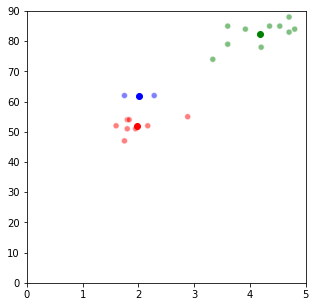

In [19]:
colmap = {1:'r' , 2:'g', 3:'b'}
fig = plt.figure(figsize=(5,5))
colors = map(lambda x: colmap[x], clusters)
colors1 = list(colors)
plt.scatter(df['duration'],df['wait'], color=colors1, alpha=0.5,edgecolor='2')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(0,5)
plt.ylim(0,90)
plt.show()